**ESCUELA DE INGENIERÍA MECATRÓNICA**

## `PROCESAMIENTO DIGITAL DE SEÑALES E IMÁGENES`

### `Docente: Ms. Ing. Emerson Maximo Asto Rodriguez`

```
Práctica 10: Filtrado en el espacio
```

### 1. Implemente un algoritmo que permita realizar la correlacion 2D de una imagen de MxN con una mascara de mxn
* El algoritmo debe retornar una imagen de las mismas dimensiones que la imagen de entrada, recuerde que el "padding" usualmente se hace con ceros, no obstante se puede duplicar filas o columnas del borde, o hacerlo mediante un espejo sobre el borde.*

* El algoritmo tambien puede obtener la solución sin necesidad del "padding", agregando varias condicionales que permitan solo ponderar con los datos coincidentes.*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def filtro_espacial(imagen, filtro):
    M, N = imagen.shape
    m, n = filtro.shape

    filas_add = (m - 1) // 2
    columnas_add = (n - 1) // 2

    img_pad = np.zeros((M + m - 1, N + n - 1), dtype=np.float32)
    img_pad[filas_add: filas_add + M, columnas_add: columnas_add + N] = imagen

    resultado = np.zeros_like(imagen)

    for i in np.arange(filas_add, filas_add + M):
        for j in np.arange(columnas_add, columnas_add + N):
            vecindad = img_pad[i-filas_add: i+filas_add+1, j-columnas_add: j+columnas_add+1]
            multiplicacion = vecindad * filtro
            resultado[i-filas_add, j-columnas_add] = np.sum(multiplicacion)

    return resultado

1. ¿Por qué es importante el uso de técnicas de padding en la aplicación de filtros espaciales? 
2. Explica qué es un kernel (o máscara) en un filtro espacial y cómo influye su tamaño en el procesamiento de imágenes.

In [135]:
img = np.arange(100).reshape(10,10)
filtro = np.round(np.ones((5,7))/35, 3)

print(img)
print(filtro)

img_filtrada = filtro_espacial(img, filtro)
print("resultado \n", img_filtrada)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]
[[0.029 0.029 0.029 0.029 0.029 0.029 0.029]
 [0.029 0.029 0.029 0.029 0.029 0.029 0.029]
 [0.029 0.029 0.029 0.029 0.029 0.029 0.029]
 [0.029 0.029 0.029 0.029 0.029 0.029 0.029]
 [0.029 0.029 0.029 0.029 0.029 0.029 0.029]]
resultado 
 [[ 4  5  6  7  8  9  9  8  7  6]
 [ 7  9 12 14 15 16 17 14 12 10]
 [12 15 19 23 24 25 26 23 19 15]
 [18 23 28 33 34 35 36 31 26 21]
 [24 30 36 43 44 45 46 40 34 27]
 [29 37 45 53 54 55 56 49 41 33]
 [35 44 54 63 64 65 66 57 48 39]
 [41 52 63 74 75 76 77 66 55 44]
 [35 44 53 63 64 64 65 56 47 38]
 [28 35 43 50 51 51 52 45 37 30]]


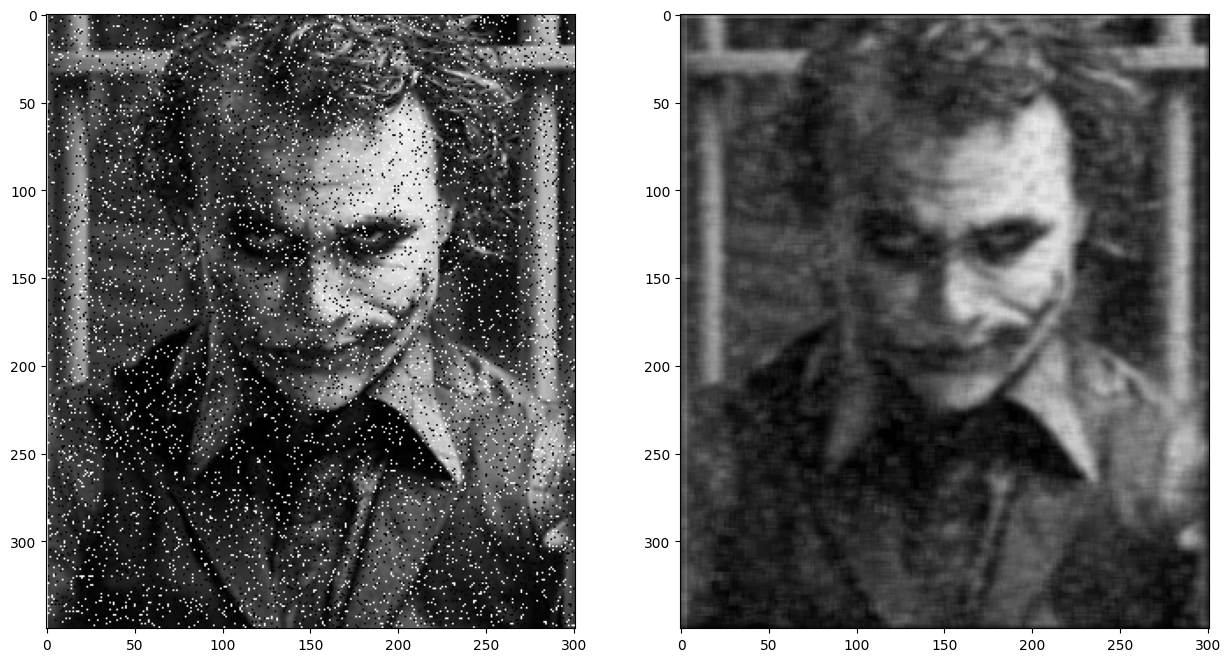

In [136]:
img_ruido = cv2.imread('lab_images/ruido.png', 0)/255

filtro = np.ones((5,7))
filtro = filtro/np.sum(filtro)

img_ruido_filtrada = filtro_espacial(img_ruido, filtro)

plt.subplots(1,2, figsize=(15,20))
plt.subplot(121)
plt.imshow(img_ruido, cmap='gray')
plt.subplot(122)
plt.imshow(img_ruido_filtrada, cmap='gray', vmin=0, vmax=1)
plt.show()

### 2.- Implemente un algoritmo que permita mejorar solo los pixeles oscuros y de bajo contraste
*Puede modificar levemente el algoritmo realizado en el enunciado **1** para lograr el objetivo*

In [9]:
def filtro_espacial_estadistico(imagen, selem = np.ones((3,3))):
    media_global = np.mean(imagen)
    desv_global = np.std(imagen)
    print("Media global:", media_global*0.3)
    print("Desviacion global:", desv_global)

    M, N = imagen.shape
    m, n = selem.shape

    filas_add = (m - 1) // 2
    columnas_add = (n - 1) // 2

    img_pad = np.zeros((M + m - 1, N + n - 1))
    img_pad[filas_add: filas_add + M, columnas_add: columnas_add+ N ] = imagen

    resultado = np.zeros_like(imagen)

    for i in np.arange(filas_add, filas_add + M):
        for j in np.arange(columnas_add, columnas_add + N):
            vecindad = img_pad[i-filas_add: i+filas_add+1, j-columnas_add: j+columnas_add+1]

            multiplicacion = vecindad * selem

            media_local = np.mean(multiplicacion)
            desv_local = np.std(multiplicacion)

            if (media_local<media_global) and (desv_local<0.8*desv_global) and (desv_local>0.2*desv_global):
                resultado[i-filas_add, j-columnas_add] = img_pad[i,j]*3
            else:
                resultado[i-filas_add, j-columnas_add] = img_pad[i,j]

    return resultado

1. ¿Cuál es el objetivo de este algoritmo y qué tipo de imágenes se benefician más de su aplicación?
2. Vecindad y Kernel: ¿Cómo se define la vecindad de un píxel en este código y cuál es la importancia de la variable selem en este contexto?
3. ¿Qué efecto tiene el factor de escala de 1.5 en los píxeles mejorados y cómo podría ajustarse para obtener diferentes resultados?

Media global: 60.1906874556213
Desviacion global: 46.7261986240285


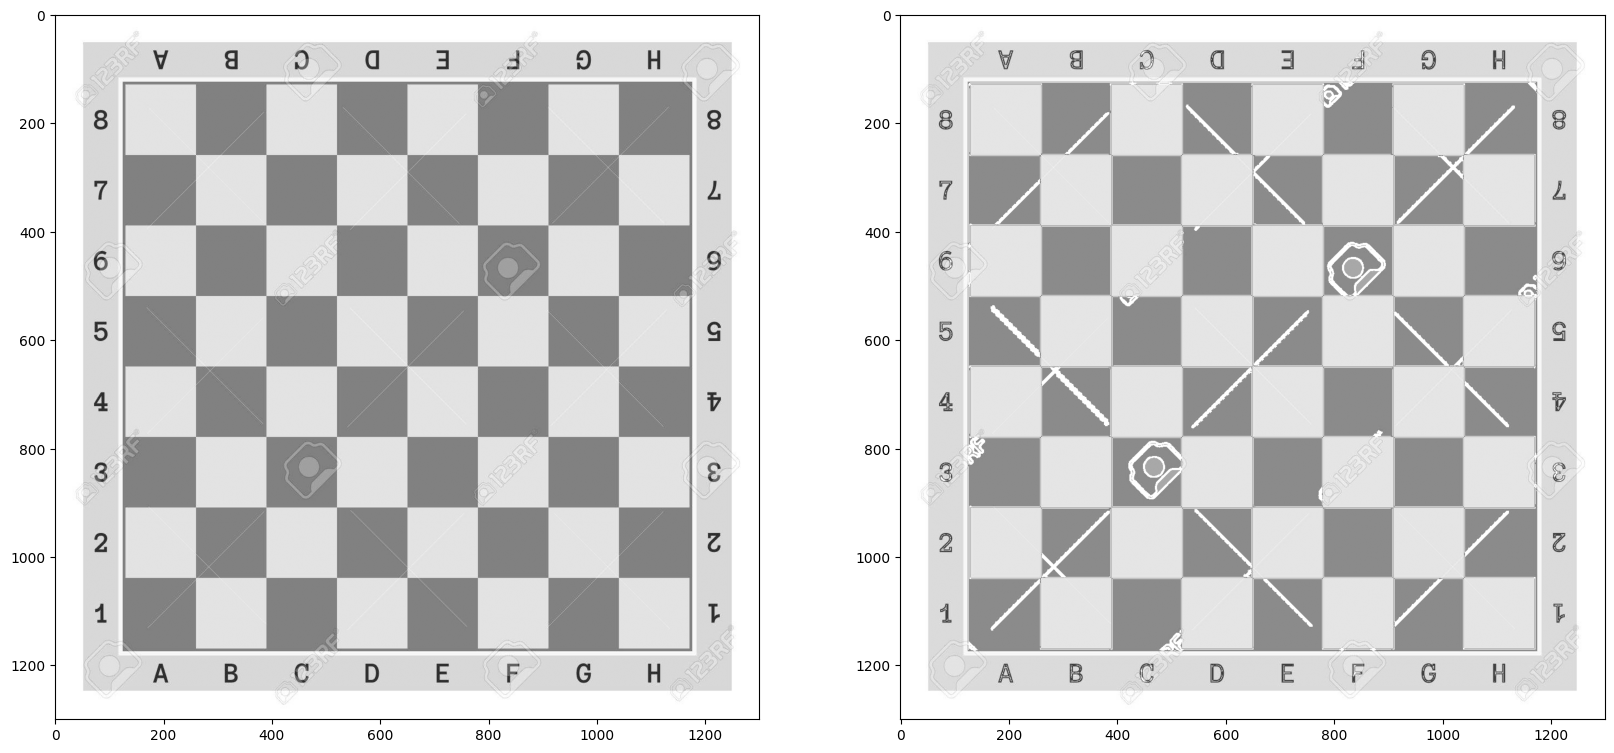

In [10]:
emma = np.uint16(cv2.imread('./lab_images/ajedrez.jpg', 0))
emma_filtrada = filtro_espacial_estadistico(emma, selem = np.ones((5,5)))
plt.subplots(1,2, figsize=(20,20))
plt.subplot(121)
plt.imshow(emma, cmap='gray')
plt.subplot(122)
plt.imshow(emma_filtrada, cmap='gray', vmin=0, vmax=255)
plt.show()

### 3.- Implemente los filtros estadisticos min, max, moda y mediana


In [153]:
from scipy.stats import mode

def filtro_espacial_estadistico(imagen, selem = np.ones((3,3)), filter_type='median'):
    M, N = imagen.shape
    m, n = selem.shape

    filas_add = (m - 1) // 2
    columnas_add = (n - 1) // 2

#     img_pad = np.zeros((M+ filas_adicionales*2, N + columnas_adicionales*2))
    img_pad = np.zeros((M + m - 1, N + n - 1))
    img_pad[filas_add: filas_add + M, columnas_add: columnas_add+ N ] = imagen

    resultado = np.zeros_like(imagen)

    for i in np.arange(filas_add, filas_add + M):
        for j in np.arange(columnas_add, columnas_add + N):
            vecindad = img_pad[i-filas_add: i+filas_add+1, j-columnas_add: j+columnas_add+1]

            multiplicacion = vecindad * selem

            if filter_type =='min':
                resultado[i-filas_add, j-columnas_add] = np.min(multiplicacion)
            elif filter_type == 'max':
                resultado[i-filas_add, j-columnas_add] = np.max(multiplicacion)
            elif filter_type == 'median':
                resultado[i-filas_add, j-columnas_add] = np.median(multiplicacion)
            elif filter_type == 'mode':
                resultado[i-filas_add, j-columnas_add] = mode(multiplicacion, axis=None, keepdims=False).mode

    return resultado

1. ¿Qué es un filtro estadístico en el procesamiento de imágenes y cómo se aplica en el código mostrado?
2. ¿Qué diferencias existen entre los filtros de tipo min, max, median y mode? Explica en qué situaciones sería adecuado usar cada tipo.

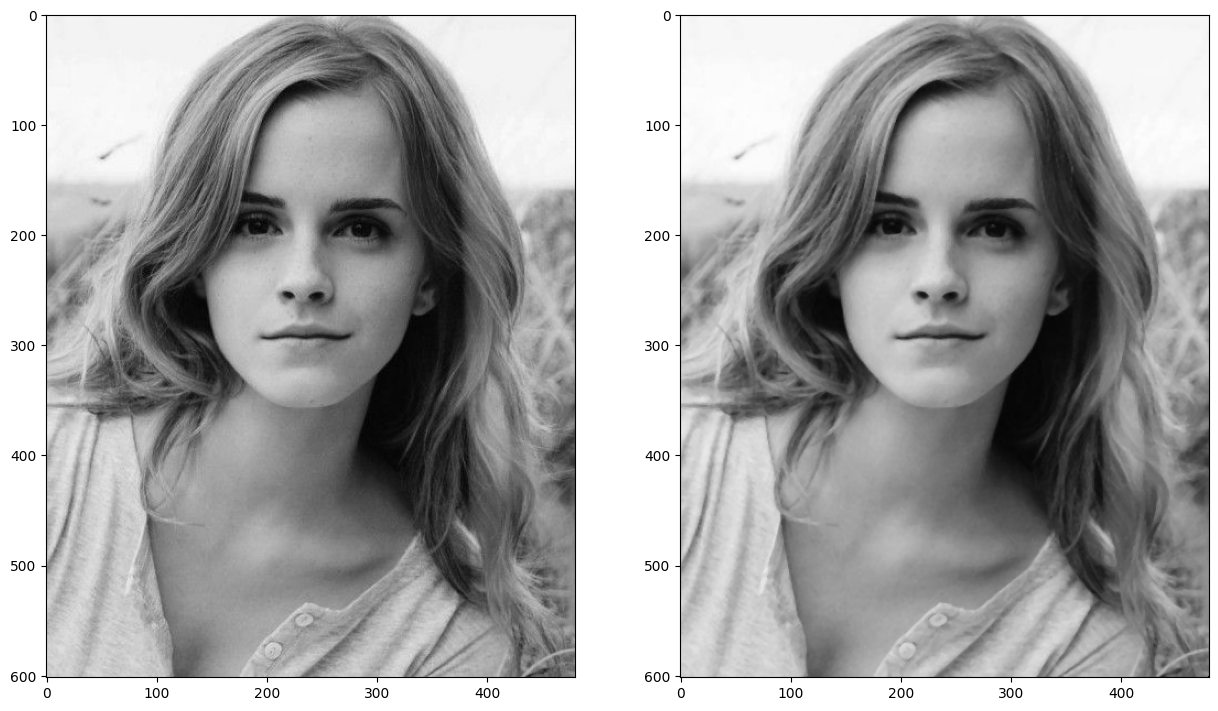

In [88]:
#MINIMO
emma = np.uint16(cv2.imread('./lab_images/emma.jpg', 0))
emma_filtrada = filtro_espacial_estadistico(emma)
plt.subplots(1,2, figsize=(15,20))
plt.subplot(121)
plt.imshow(emma, cmap='gray')
plt.subplot(122)
plt.imshow(emma_filtrada, cmap='gray')
plt.show()

In [156]:
#MAX
emma = np.uint16(cv2.imread('./lab_images/emma.jpg',0))
emma_filtrada = filtro_espacial_estadistico(emma, filter_type='max')
plt.subplots(1,2, figsize=(15,20))
plt.subplot(121)
plt.imshow(emma, cmap='gray')
plt.subplot(122)
plt.imshow(emma_filtrada, cmap='gray')
plt.show()

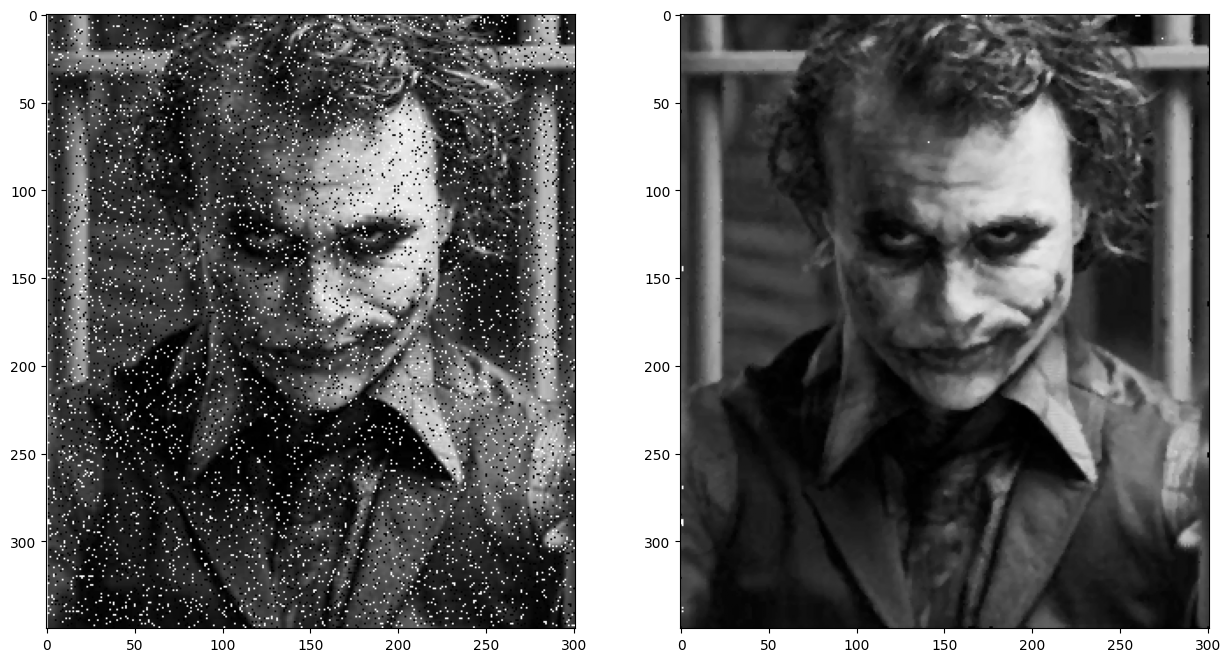

In [90]:
#MEDIANA
emma = np.uint16(cv2.imread('./lab_images/ruido.png', 0))
emma_filtrada = filtro_espacial_estadistico(emma)
plt.subplots(1,2, figsize=(15,20))
plt.subplot(121)
plt.imshow(emma, cmap='gray')
plt.subplot(122)
plt.imshow(emma_filtrada, cmap='gray')
plt.show()

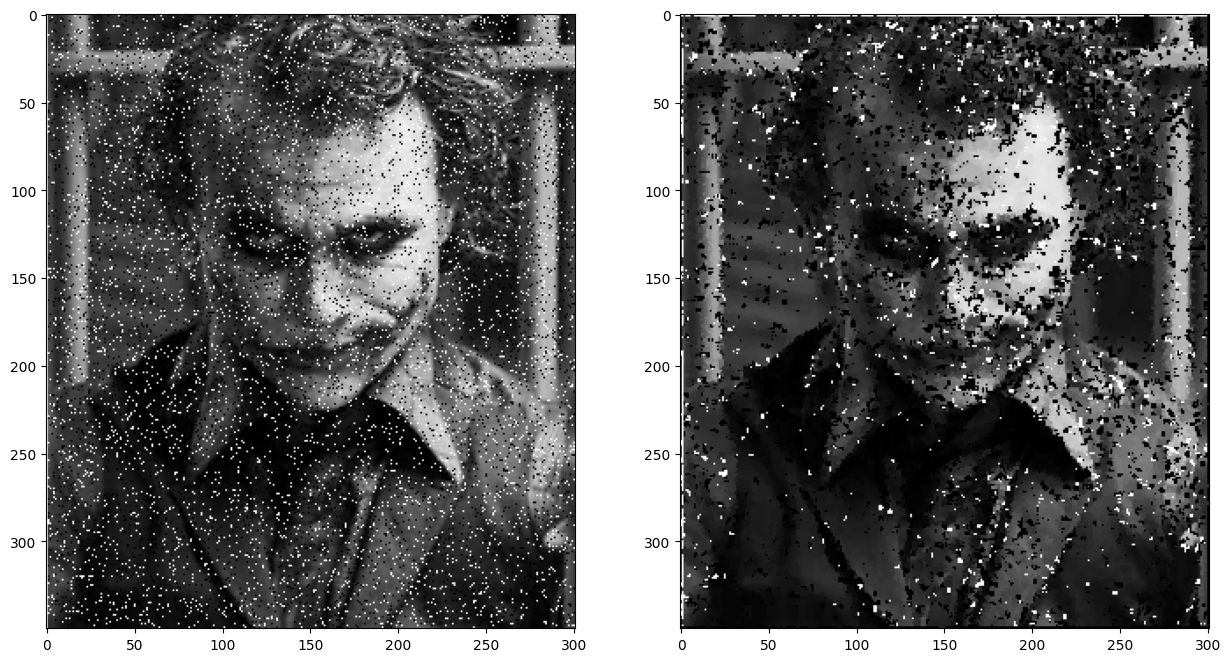

In [154]:
#MODA
emma = np.uint16(cv2.imread('./lab_images/ruido.png', 0))
emma_filtrada = filtro_espacial_estadistico(emma, filter_type='mode')
plt.subplots(1,2, figsize=(15,20))
plt.subplot(121)
plt.imshow(emma, cmap='gray')
plt.subplot(122)
plt.imshow(emma_filtrada, cmap='gray')
plt.show()

### 4.- Implemente los filtros espaciales de suavizado y nitidez explicados en clase

Utilizando la funcion **convolve2d(img, kernel, mode= "same")** de **scipy.signal** y los kernels: 
(tambien se puede usar **correlate2d**)
* Promedio
* Gaussiano
* Laplaciano


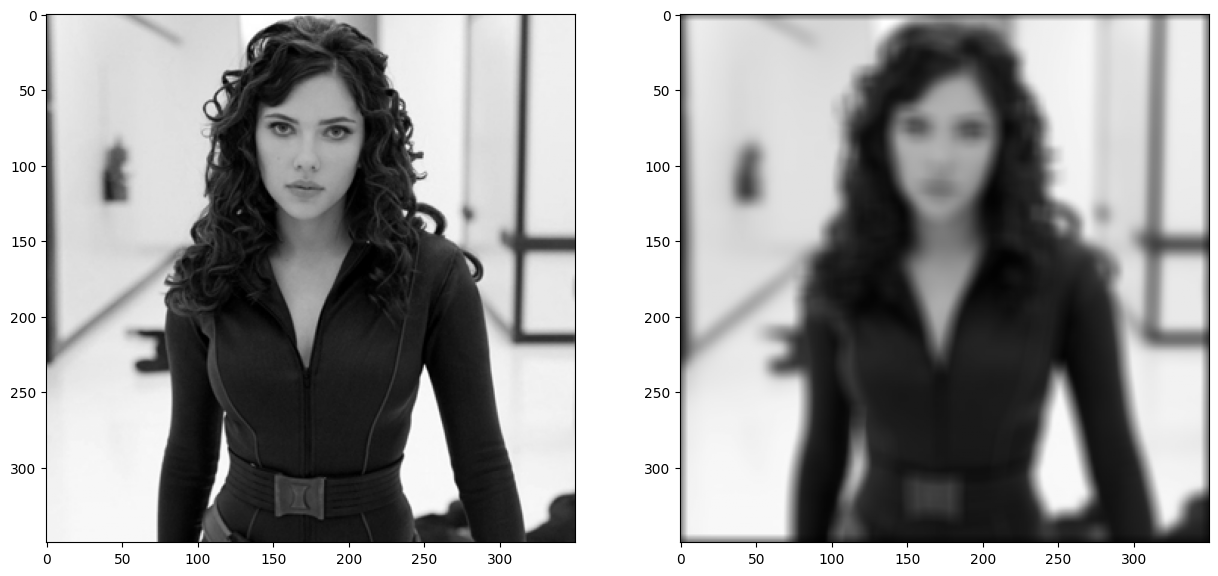

In [94]:
#PROMEDIO
from scipy import signal

img = cv2.imread("./lab_images/scarlett_oc.png", 0)/255
kernel = np.ones((11,11))/121

out = signal.convolve2d(img, kernel, mode= "same")

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.subplot(122)
plt.imshow(np.abs(out), cmap="gray", vmin=0, vmax=1)
plt.show()

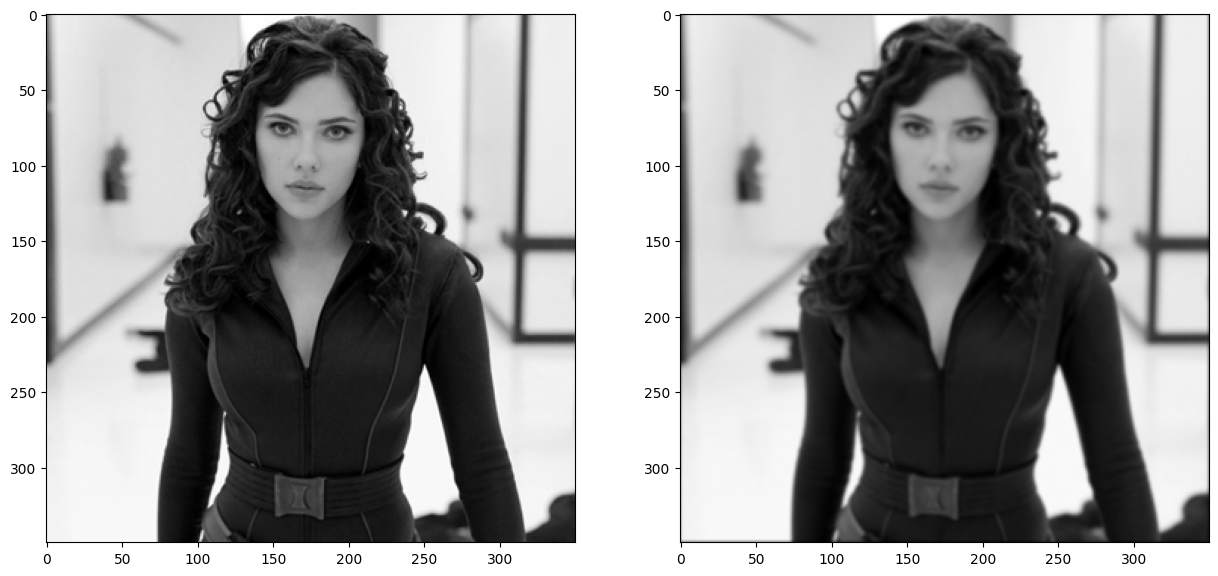

In [95]:
#PROMEDIO
from scipy import signal

img = cv2.imread("./lab_images/scarlett_oc.png", 0)/255
# kernel = np.array([[1,2,1], [2,4,2], [1,2,1]])/16
kernel = np.array([1,4,7,4,1])*np.array([[1],[4],[7],[4],[1]])
kernel = kernel/np.sum(kernel)

out = signal.convolve2d(img, kernel, mode= "same")

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.subplot(122)
plt.imshow(np.abs(out), cmap="gray", vmin=0, vmax=1)
plt.show()

In [ ]:
#LAPLACIANO
from scipy import signal
A = 1.5
img = cv2.imread("./lab_images/scarlett_oc.png", 0)/255
kernel = np.array([[-1,-1,-1], [-1,A+8,-1], [-1,-1,-1]])

out = signal.convolve2d(img, kernel, mode= "same")

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.subplot(122)
plt.imshow(out, cmap="gray", vmin=0, vmax=1)
plt.show()

**Utilizando OpenCV:**
* cv2.blur(img, (Tamaño_kernel))
* cv2.GaussianBlur(img,(Tamaño_kernel),desviacion_estandar)
* cv2.medianBlur(img,Tamaño_kernel)
* cv2.bilateralFilter(img,tamaño_kernel,sigmacolor,sigmaspace)  [Mas info](https://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/MANDUCHI1/Bilateral_Filtering.html)

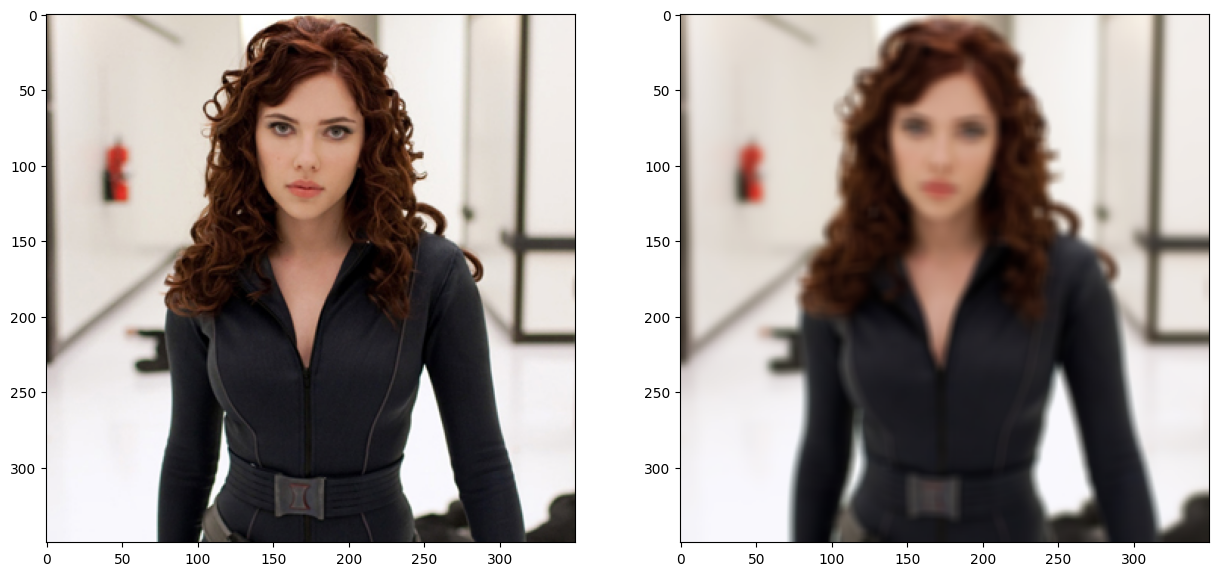

In [97]:
img = cv2.imread("./lab_images/scarlett_oc.png")[..., ::-1]

out = cv2.blur(img, (7,7))

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.subplot(122)
plt.imshow(out, cmap="gray", vmin=0, vmax=1)
plt.show()

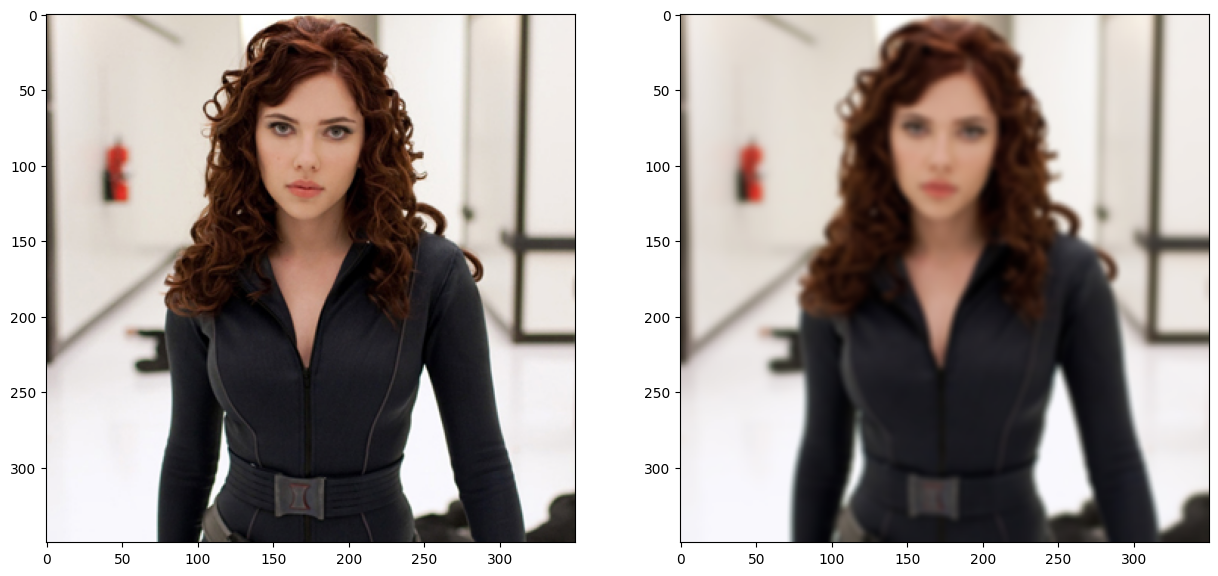

In [98]:
out = cv2.GaussianBlur(img,(7,7), 2)

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.subplot(122)
plt.imshow(out, cmap="gray", vmin=0, vmax=1)
plt.show()

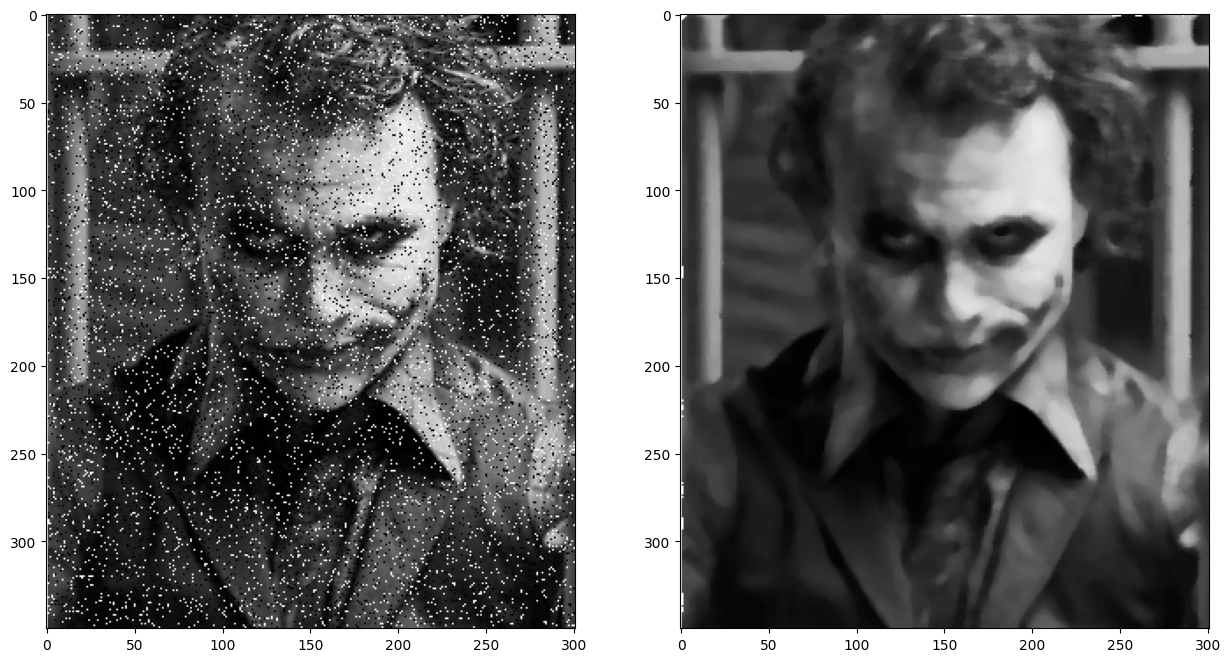

In [99]:
img_joker = cv2.imread('./lab_images/ruido.png')[..., ::-1]

img_joker_filtrada = cv2.medianBlur(img_joker, 7)

plt.subplots(1,2, figsize=(15,20))
plt.subplot(121)
plt.imshow(img_joker, cmap='gray')
plt.subplot(122)
plt.imshow(img_joker_filtrada, cmap='gray')
plt.show()

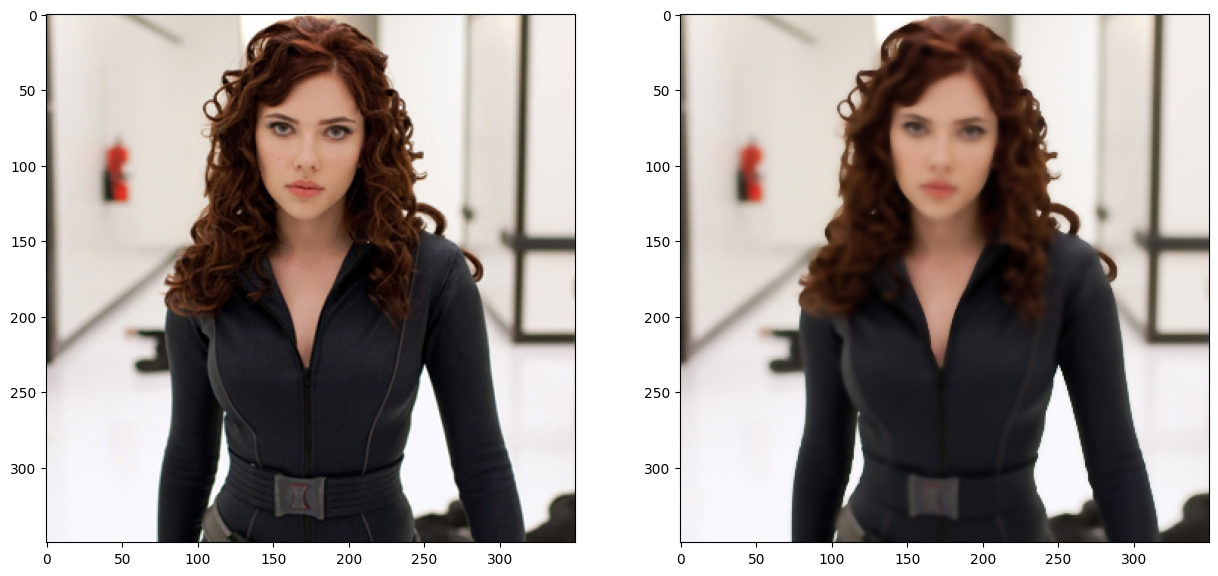

In [100]:
out = cv2.bilateralFilter(img,7, 160, 160)

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.subplot(122)
plt.imshow(out, cmap="gray", vmin=0, vmax=1)
plt.show()

1. ¿Cuál es la diferencia fundamental entre los filtros de suavizado (como el de promedio y el Gaussiano) y los filtros de nitidez (como el Laplaciano)?
2. ¿Cuáles son las principales diferencias en los resultados obtenidos al aplicar un filtro de promedio versus un filtro Gaussiano?
3. ¿Qué propiedades tiene el kernel Laplaciano y cómo contribuye a la nitidez de la imagen? ¿Qué efectos visuales produce al aplicarse a una imagen?
4. ¿Qué significa el argumento mode="same" en la función convolve2d y cómo afecta el tamaño de la imagen resultante después de aplicar el filtro?

### 5.- Implemente un algoritmo para muestre el uso de la mascara de desenfoque (unsharp mask) y el filtro de altoaumento (Highboost)

In [101]:
img = cv2.imread("./lab_images/scarlett_oc.png")[..., ::-1]/255

blur = cv2.blur(img, (7,7))

mask = img - blur

unsharp_image = mask + img

plt.figure(figsize=(20,15))
plt.subplot(131)
plt.imshow(img, cmap="gray")
plt.subplot(132)
plt.imshow(mask, cmap="gray")
plt.subplot(133)
plt.imshow(unsharp_image, cmap='gray', vmin=0, vmax=1)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5527010804321724..0.7063625450180081].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.47162865146058397..1.702681072428972].


1. ¿Cómo funciona la máscara de desenfoque (unsharp mask) para realzar los detalles de una imagen, y cuál es el papel del filtro de suavizado en este proceso?
2.  ¿En qué se diferencia el filtro de alto aumento (Highboost) de la máscara de desenfoque estándar, y cómo se puede ajustar el factor de amplificación (boosting factor) para controlar el nivel de realce en la imagen?

### 6.- Implemente un algoritmo para mostrar la gradiente de una imagen
**Use las mascaras:**
* Roberts
* Prewit
* Sobel
* Scharr

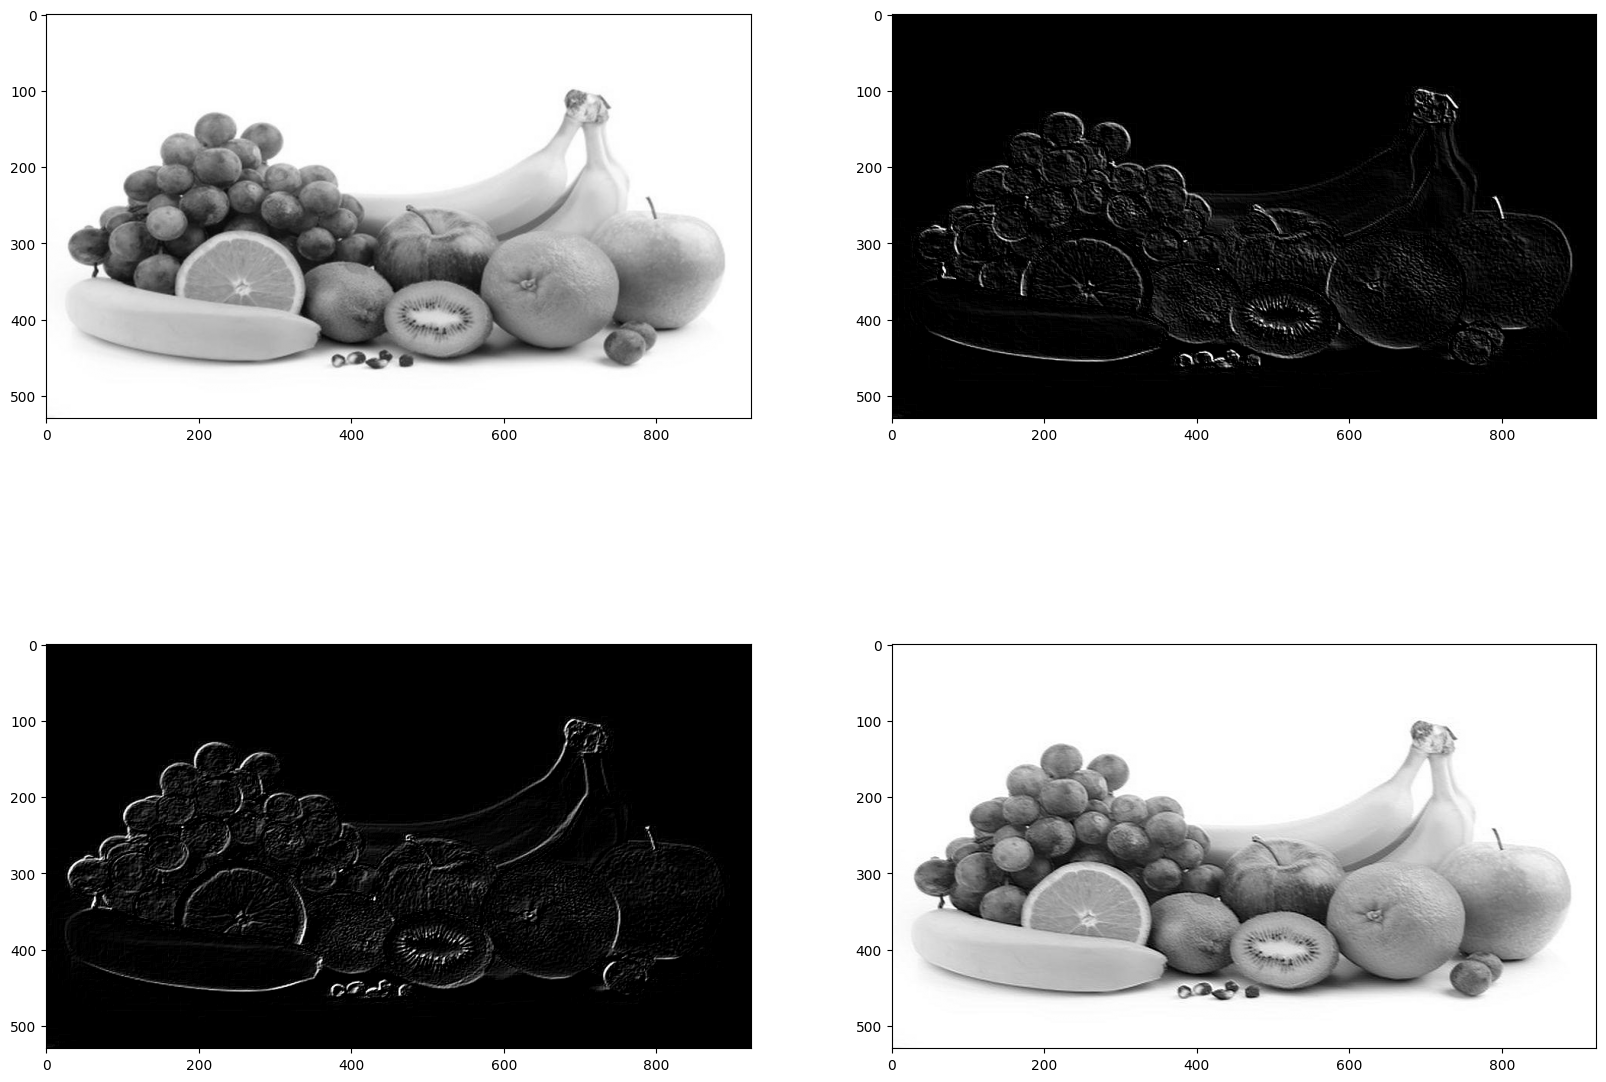

In [102]:
#ROBERTS
img = cv2.imread("./lab_images/frutas.jpg", 0)/255

kernelh = np.array([[0,-1],[1,0]])
kernelv = np.array([[-1,0],[0,1]])

outh = signal.convolve2d(img, kernelh, mode= "same")
outv = signal.convolve2d(img, kernelv, mode= "same")

outf = outh + outv

plt.figure(figsize=(20,15))
plt.subplot(221)
plt.imshow(img, cmap="gray")
plt.subplot(222)
plt.imshow(outh * 5, cmap="gray", vmin=0, vmax=1)
plt.subplot(223)
plt.imshow(outv * 5, cmap="gray", vmin=0, vmax=1)
plt.subplot(224)
plt.imshow(outf + img, cmap="gray", vmin=0, vmax=1)
plt.show()

Luego de implementar las mascaras de gradientes

1. ¿Cuál es la característica distintiva de la máscara de Roberts al calcular el gradiente de una imagen, y por qué podría ser menos precisa que otras máscaras?
2. ¿Cómo afectan las máscaras de Sobel y Scharr a la precisión y sensibilidad en la detección de bordes en una imagen? ¿En qué casos se prefiere una sobre la otra?